In [1]:
#import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
df = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
#check the data
print("data size : ",df.shape)
print(50*"=")
print("ceck for missing values : ",df.isnull().sum())

data size :  (2111, 17)
ceck for missing values :  Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
#check for duplicates and remove it if contain
df.drop_duplicates(inplace=True)

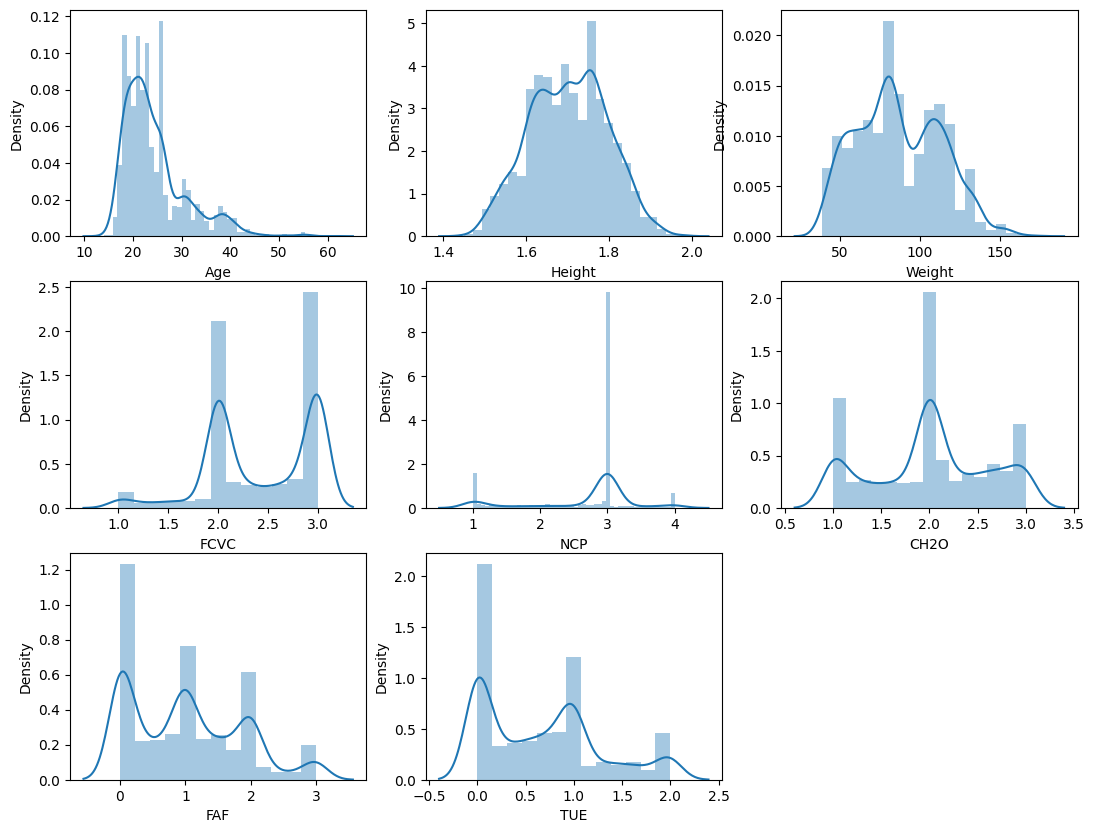

In [6]:
# graphical EDA analysis
columns = df.columns.values
numerical_cols = []
for i in columns:
    if df[i].dtypes != "object":
        numerical_cols.append(i)
f = plt.figure(figsize=(13,10))
for i in range(len(numerical_cols)):
    f.add_subplot(3, 3, i+1)
    sns.distplot(df[numerical_cols[i]], hist=True)
plt.show()

In [7]:
#checking data information
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
## Checking All Columns Available in dataset
columns = df.columns

In [9]:
for col in columns:
    if(df[col].dtypes == "object"):
        print(df[col].value_counts())
        print(100*"=")

Male      1052
Female    1035
Name: Gender, dtype: int64
yes    1722
no      365
Name: family_history_with_overweight, dtype: int64
yes    1844
no      243
Name: FAVC, dtype: int64
Sometimes     1761
Frequently     236
Always          53
no              37
Name: CAEC, dtype: int64
no     2043
yes      44
Name: SMOKE, dtype: int64
no     1991
yes      96
Name: SCC, dtype: int64
Sometimes     1380
no             636
Frequently      70
Always           1
Name: CALC, dtype: int64
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: NObeyesdad, dtype: int64


In [10]:
# Preprocess the dataset
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['family_history_with_overweight'] = encoder.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = encoder.fit_transform(df['FAVC'])
df['CAEC'] = encoder.fit_transform(df['CAEC'])
df['SMOKE'] = encoder.fit_transform(df['SMOKE'])
df['SCC'] = encoder.fit_transform(df['SCC'])
df['CALC'] = encoder.fit_transform(df['CALC'])
df['MTRANS'] = encoder.fit_transform(df['MTRANS'])
df['NObeyesdad'] = encoder.fit_transform(df['NObeyesdad'])

In [11]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [12]:
# Split the dataset into features (X) and target (y)
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_predictions = dt_clf.predict(X_test)

In [15]:
# Logistic Regression Classifier
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_predictions = lr_clf.predict(X_test)

In [16]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)

In [17]:
# Support Vector Machine (SVM) Classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_predictions = svm_clf.predict(X_test)

In [18]:
# Print classification reports for each classifier
print("Decision Tree Classifier:")
print(classification_report(y_test, dt_predictions))
print(100*"=")
# Print classification reports for each classifier
print("Logistic Regression Classifier:")
print(classification_report(y_test, lr_predictions))
print(100*"=")
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))
print(100*"=")
print("SVM Classifier:")
print(classification_report(y_test, svm_predictions))

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        59
           1       0.86      0.72      0.79        61
           2       0.94      0.96      0.95        70
           3       0.98      0.98      0.98        64
           4       1.00      1.00      1.00        60
           5       0.82      0.89      0.85        55
           6       0.96      0.96      0.96        49

    accuracy                           0.93       418
   macro avg       0.92      0.93      0.92       418
weighted avg       0.93      0.93      0.92       418

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        59
           1       0.50      0.43      0.46        61
           2       0.54      0.59      0.56        70
           3       0.81      0.80      0.80        64
           4       0.91      1.00      0.95        60
           5       0

#### *From the above model training of classification **Random Forest** gives the highest accuracy i.e 96%*

In [19]:
## hypertuning the model using grid search cv
params={
    
    "n_estimators":[50,100,200],
    "criterion":["gini","entropy"],
    "max_depth":[3,5,10]
    
}

In [20]:
model = RandomForestClassifier()
cv=RandomizedSearchCV(model,param_distributions=params,scoring='accuracy',cv=5,verbose=3)

In [21]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=50;, score=0.707 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=50;, score=0.754 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=50;, score=0.692 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=50;, score=0.659 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=50;, score=0.760 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.949 total time=   0.8s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.943 total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.937 total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.943 total time=   0.6s
[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.955 total time=   0.6s
[CV 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy', verbose=3)

In [22]:
cv.best_params_

{'n_estimators': 200, 'max_depth': 10, 'criterion': 'entropy'}

In [23]:
bestmodel=RandomForestClassifier(n_estimators=200,max_depth=10,criterion='entropy',oob_score=True)

In [24]:
bestmodel.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       oob_score=True)

In [25]:
y_pred=bestmodel.predict(X_test)
best_accuracy=round(accuracy_score(y_test,y_pred)*100,2)
print(best_accuracy)

96.17


##### Finally the best accuracy after *hyper-tunning the Random Forest Model is 96.17%* which may varies in 96-97